# 9. Aim: Implementation of convolutional neural network to predict number from number images

11490434/11490434 [==============================] - 0s 0us/step


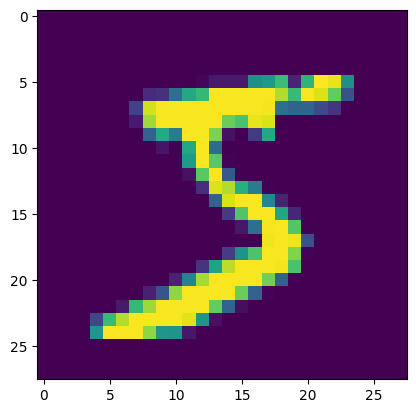

(28, 28)


In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import matplotlib.pyplot as plt

# Download MNIST data and split into train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Plot the first image in the dataset
plt.imshow(X_train[0])
plt.show()
print(X_train[0].shape)

In [2]:
# Reshape data for CNN (add channel dimension)
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

# One-hot encode labels
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

# Print an example of one-hot encoded label
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [3]:
# Define the model architecture
model = Sequential()

# Learn image features with convolutional layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())

# Add a dense layer with softmax activation for 10-class classification
model.add(Dense(10, activation='softmax'))

# Compile the model for training
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with validation data
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=3)

# Make predictions on the first 4 test images
predictions = model.predict(X_test[:4])
print(predictions)  # Predicted probabilities for each class

Epoch 1/3
1875/1875 [==============================] - 184s 96ms/step - loss: 0.2592 - accuracy: 0.9500 - val_loss: 0.0971 - val_accuracy: 0.9687
Epoch 2/3
1875/1875 [==============================] - 162s 86ms/step - loss: 0.0692 - accuracy: 0.9791 - val_loss: 0.0739 - val_accuracy: 0.9774
Epoch 3/3
1/1 [==============================] - 0s 98ms/step
[[1.4193917e-08 1.5162138e-13 1.8317252e-04 5.3784464e-05 4.3299665e-16
  4.2247233e-11 1.3033843e-12 9.9976295e-01 1.2024559e-07 3.3877430e-09]
 [5.2122549e-11 2.6757169e-10 1.0000000e+00 1.1412729e-09 1.0514890e-11
  1.3204709e-15 3.4573538e-11 2.3792109e-13 3.7407819e-10 5.0964067e-16]
 [1.4583209e-06 9.9895906e-01 8.3623985e-05 1.9719964e-06 2.7530619e-05
  2.9076022e-05 4.8655620e-05 9.4327214e-07 8.4383803e-04 3.8968228e-06]
 [9.9828523e-01 2.2271436e-09 3.7513390e-05 4.7662255e-07 1.4266816e-07
  8.8060595e-08 1.6047392e-03 5.3537583e-09 3.0650725e-05 4.1126830e-05]]


In [4]:
# Print the actual labels for the first 4 test images
print(Y_test[:4])  # One-hot encoded labels


[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
